COMP 215 - LAB 1
----------------
#### Name:
#### Date:
This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

As will be usual, the fist code cell, below, simply imports all the modules we'll be using...

In [19]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint

Now, let's fetch some Covid-19 daily case-count data from the Open Covid API:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=2022-11-01`  # since the 1st of november (note date format:  yyyy-mm-dd)

In [27]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=2022-11-01'

response = requests.request("GET", query, headers={}, data={})
print(type(response.text), response.text)

<class 'str'> {"data":{"cases":[{"name":"cases","region":"BC","date":"2022-11-01","value":387876,"value_daily":62},{"name":"cases","region":"BC","date":"2022-11-02","value":387958,"value_daily":82},{"name":"cases","region":"BC","date":"2022-11-03","value":387993,"value_daily":35},{"name":"cases","region":"BC","date":"2022-11-04","value":388053,"value_daily":60},{"name":"cases","region":"BC","date":"2022-11-05","value":388113,"value_daily":60},{"name":"cases","region":"BC","date":"2022-11-06","value":388177,"value_daily":64},{"name":"cases","region":"BC","date":"2022-11-07","value":388247,"value_daily":70},{"name":"cases","region":"BC","date":"2022-11-08","value":388321,"value_daily":74},{"name":"cases","region":"BC","date":"2022-11-09","value":388399,"value_daily":78},{"name":"cases","region":"BC","date":"2022-11-10","value":388475,"value_daily":76},{"name":"cases","region":"BC","date":"2022-11-11","value":388537,"value_daily":62},{"name":"cases","region":"BC","date":"2022-11-12","valu

Notice that the response looks like a dictionary, but is actually just a string of text (most data is exchanged on the web as plain text!).  This particular data format is called "[JSON](https://en.wikipedia.org/wiki/JSON)" 

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [21]:
result = json.loads(response.text)
# pprint(result) # remove this comment and re-run this cell to see the resulting dictionary

Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we convert the date strings, using strptime, into a real date objects so they are easier to work with (format: yyyy-mm-dd)

In [26]:
cases = result['data']['cases']
date_strings = [daily['date'] for daily in cases]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in date_strings]
cases = [daily['value_daily'] for daily in cases]
print(dates)
print(cases)

[datetime.datetime(2022, 11, 1, 0, 0), datetime.datetime(2022, 11, 2, 0, 0), datetime.datetime(2022, 11, 3, 0, 0), datetime.datetime(2022, 11, 4, 0, 0), datetime.datetime(2022, 11, 5, 0, 0), datetime.datetime(2022, 11, 6, 0, 0), datetime.datetime(2022, 11, 7, 0, 0), datetime.datetime(2022, 11, 8, 0, 0), datetime.datetime(2022, 11, 9, 0, 0), datetime.datetime(2022, 11, 10, 0, 0), datetime.datetime(2022, 11, 11, 0, 0), datetime.datetime(2022, 11, 12, 0, 0), datetime.datetime(2022, 11, 13, 0, 0), datetime.datetime(2022, 11, 14, 0, 0), datetime.datetime(2022, 11, 15, 0, 0), datetime.datetime(2022, 11, 16, 0, 0), datetime.datetime(2022, 11, 17, 0, 0), datetime.datetime(2022, 11, 18, 0, 0), datetime.datetime(2022, 11, 19, 0, 0), datetime.datetime(2022, 11, 20, 0, 0), datetime.datetime(2022, 11, 21, 0, 0), datetime.datetime(2022, 11, 22, 0, 0), datetime.datetime(2022, 11, 23, 0, 0), datetime.datetime(2022, 11, 24, 0, 0), datetime.datetime(2022, 11, 25, 0, 0), datetime.datetime(2022, 11, 26, 0

## Exercise 1

In the code cell below, re-write each of the 3 "list comprehensions" above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumlator" algorithm (and more efficient too!)

In [23]:
# Your code here


Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html



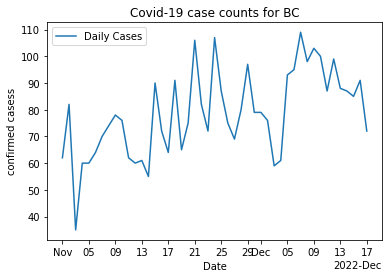

In [24]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for BC")  # Add a title to the axes.
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (should be just a few characters), and re-run the analysis
 * You can get the ***hruid*** location code for each health region here:  https://github.com/ccodwg/CovidTimelineCanada/blob/main/geo/hr.csv
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## Exercise 3

Notice that the data plot looks quite erratic.  These swings most likely represent artifacts attributable to the reporting process rather than actual changes in infection rates.

 * One way to fix this is is to "smooth" the date with a "7-day rolling average".
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plot with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices
